In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [2]:
#Downloading the Data
df = yf.download('MSFT', start='2020-01-01', end='2025-01-01', auto_adjust=True)
df.dropna(inplace=True)
df.reset_index(inplace=True)
data = df
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price        Date       Close        High         Low        Open    Volume
Ticker                   MSFT        MSFT        MSFT        MSFT      MSFT
0      2020-01-02  153.042267  153.147078  150.860311  151.289078  22622100
1      2020-01-03  151.136673  152.403928  150.603095  150.850838  21116200
2      2020-01-06  151.527359  151.594064  149.126242  149.669358  20813700
3      2020-01-07  150.145752  152.137147  149.898023  151.803668  21634100
4      2020-01-08  152.537338  153.213849  150.498299  151.432061  27746500


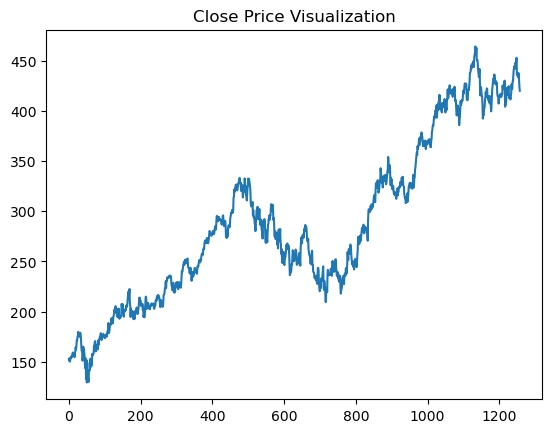

In [3]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [4]:
df.shape

(1258, 6)

Plotting moving averages of 100 day


In [5]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,MSFT
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1253,420.485275
1254,420.928162
1255,421.251277
1256,421.529322


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

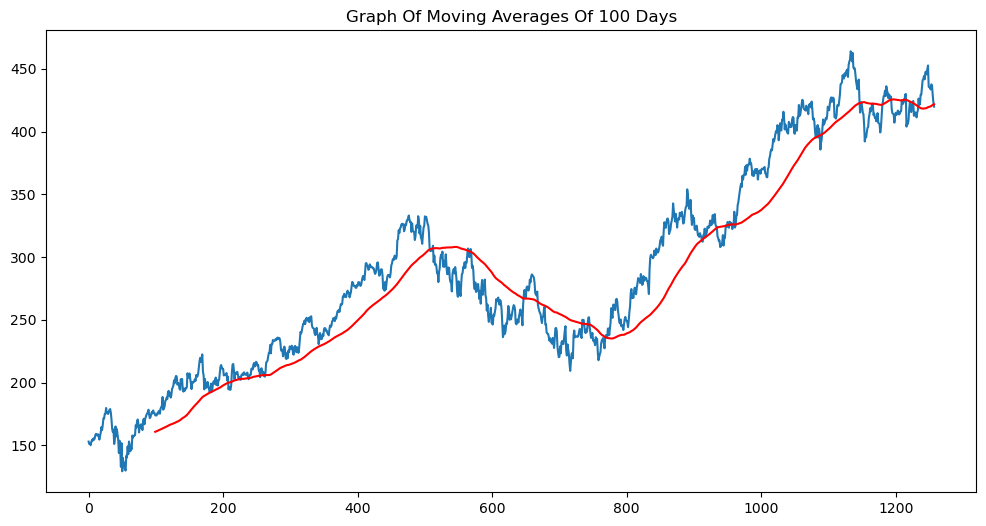

In [6]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

Spliting the dataset into training (70%) and testing (30%) set

In [7]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(880, 6)
(378, 6)


In [8]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
0,2020-01-02,153.042267,153.147078,150.860311,151.289078,22622100
1,2020-01-03,151.136673,152.403928,150.603095,150.850838,21116200
2,2020-01-06,151.527359,151.594064,149.126242,149.669358,20813700
3,2020-01-07,150.145752,152.137147,149.898023,151.803668,21634100
4,2020-01-08,152.537338,153.213849,150.498299,151.432061,27746500


Using MinMax scaler for normalization of the dataset

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [11]:
data_training_array = scaler.fit_transform(train_close)



In [12]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [13]:
x_train.shape

(780, 100, 1)

In [14]:
data_testing_array = scaler.transform(test_close)

In [15]:
x_test = []
y_test = []

for i in range(100, data_testing_array.shape[0]):
    x_test.append(data_testing_array[i-100:i])
    y_test.append(data_testing_array[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

ML Model (LSTM)

In [16]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\Annu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - MAE: 0.4040 - loss: 0.2178 - val_MAE: 0.1982 - val_loss: 0.0442
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - MAE: 0.1348 - loss: 0.0284 - val_MAE: 0.1484 - val_loss: 0.0271
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - MAE: 0.0995 - loss: 0.0156 - val_MAE: 0.5698 - val_loss: 0.3968
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - MAE: 0.1026 - loss: 0.0183 - val_MAE: 0.0799 - val_loss: 0.0104
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - MAE: 0.0925 - loss: 0.0142 - val_MAE: 0.0733 - val_loss: 0.0085
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - MAE: 0.0836 - loss: 0.0116 - val_MAE: 0.0682 - val_loss: 0.0082
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - MAE: 0.0853 - loss: 0.0120 - val_MAE: 0.0903 - val_loss: 0.0112
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - MAE: 0.0794 - loss: 0.0102 - val_MAE: 0.0798 - val_loss: 0.0109
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - MAE: 0.082

In [20]:
model.save('my_model.keras')

In [21]:
test_close.shape

(378, 1)

In [22]:
past_100_days = pd.DataFrame(train_close[-100:])

In [23]:
test_df = pd.DataFrame(test_close)

In [24]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [25]:
final_df.head()

,0
0,255.341778
1,267.759430
2,268.347475
3,256.321823
4,262.310192


In [26]:
input_data = scaler.fit_transform(final_df)


In [27]:
input_data.shape

(478, 1)

Testing the model

In [28]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)



(378, 100, 1)
(378,)


In [29]:
y_pred = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


Making prediction and plotting the graph of predicted vs actual values


In [30]:
# Making predictions

y_pred = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [31]:
y_pred.shape

(378, 1)

In [32]:
y_test

array([0.41478551, 0.39653376, 0.40637183, 0.41536419, 0.39435269,
       0.37859447, 0.40325597, 0.41643229, 0.45217841, 0.44367578,
       0.44434359, 0.5152122 , 0.47879869, 0.45912288, 0.44443287,
       0.45004161, 0.42480144, 0.42052797, 0.39021283, 0.40468047,
       0.3969792 , 0.39003462, 0.35606951, 0.38224448, 0.36661965,
       0.36034295, 0.35816165, 0.35615857, 0.33051756, 0.33554787,
       0.34271482, 0.33594507, 0.33478509, 0.30779608, 0.32314189,
       0.35691153, 0.34941709, 0.38969982, 0.33893401, 0.35762523,
       0.34076294, 0.37105281, 0.37341734, 0.38282966, 0.37252474,
       0.3920639 , 0.38274045, 0.37738719, 0.40928348, 0.40294881,
       0.38282983, 0.41780359, 0.40785594, 0.36717165, 0.35990042,
       0.37479987, 0.32907512, 0.33826483, 0.3171642 , 0.31065116,
       0.29802649, 0.29218255, 0.32233897, 0.31578108, 0.33607859,
       0.30574405, 0.3283166 , 0.31698569, 0.35356552, 0.38126843,
       0.38238362, 0.37952865, 0.3876032 , 0.3816699 , 0.37515

In [33]:
scaler.scale_

array([0.00452077])

In [34]:
scale_factor = 1/0.00452077
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

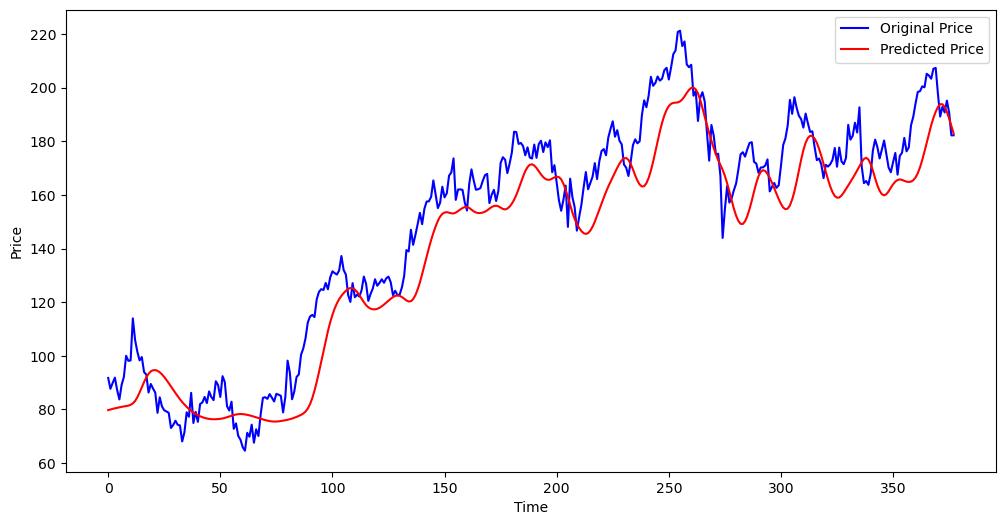

In [35]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Model evaluation

In [36]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  12.005871737084519
